**1. Импортирование необходимых библиотек.**

In [2]:
import pandas as pd
import numpy as np
from feature_engine.creation import MathFeatures
from sklearn.model_selection import train_test_split, cross_validate, KFold, StratifiedKFold
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.cluster import KMeans, SpectralClustering, AgglomerativeClustering, BisectingKMeans
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.utils import class_weight
from tabgan.sampler import OriginalGenerator, GANGenerator, ForestDiffusionGenerator, LLMGenerator
import tensorflow as tf
import matplotlib.pyplot as plt

**2. Предобработка данных.**

**2.1. Загрузка данных.**

In [3]:
filename="data.csv"
filepath="./"+filename
df_features = pd.read_csv(filepath, delimiter=";")

**2.2. Просмотр данных.**

In [4]:
df_features.head()

,Пол,Приоритет,Балл по математике,Балл по русскому языку,Балл по выбранному предмету,Балл за индивидуальные достижения,Наличие серебрянной медали,Наличие золотой медали
0,1,1,95,67,72,20,0,0
1,0,1,64,67,64,0,0,0
2,0,1,58,69,56,0,0,0
3,0,1,39,58,68,0,0,0
4,0,1,46,52,53,0,0,0


In [5]:
df_features.describe()

,Пол,Приоритет,Балл по математике,Балл по русскому языку,Балл по выбранному предмету,Балл за индивидуальные достижения,Наличие серебрянной медали,Наличие золотой медали
count,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000
mean,0.206897,1.258621,69.732759,71.017241,68.620690,4.948276,0.025862,0.017241
std,0.406838,0.512805,15.240311,13.480409,12.522436,6.220366,0.159412,0.130734
min,0.000000,1.000000,0.000000,0.000000,18.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,64.000000,64.000000,62.000000,0.000000,0.000000,0.000000
50%,0.000000,1.000000,74.000000,72.000000,71.500000,3.000000,0.000000,0.000000
75%,0.000000,1.000000,80.000000,80.250000,78.000000,10.000000,0.000000,0.000000
max,1.000000,3.000000,95.000000,100.000000,94.000000,30.000000,1.000000,1.000000


In [6]:
df_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116 entries, 0 to 115
Data columns (total 8 columns):
 #   Column                             Non-Null Count  Dtype
---  ------                             --------------  -----
 0   Пол                                116 non-null    int64
 1   Приоритет                          116 non-null    int64
 2   Балл по математике                 116 non-null    int64
 3   Балл по русскому языку             116 non-null    int64
 4   Балл по выбранному предмету        116 non-null    int64
 5   Балл за индивидуальные достижения  116 non-null    int64
 6   Наличие серебрянной медали         116 non-null    int64
 7   Наличие золотой медали             116 non-null    int64
dtypes: int64(8)
memory usage: 7.4 KB


In [7]:
df_features.isnull().sum()

Пол                                  0
Приоритет                            0
Балл по математике                   0
Балл по русскому языку               0
Балл по выбранному предмету          0
Балл за индивидуальные достижения    0
Наличие серебрянной медали           0
Наличие золотой медали               0
dtype: int64

**2.3. Генерация новых признаков.**

**2.3.1. Средний балл по экзаменам.**

In [8]:
mf_mean = MathFeatures(variables=["Балл по математике", "Балл по русскому языку", "Балл по выбранному предмету"], func = "mean", new_variables_names=["Средний балл по экзаменам"])
mf_mean.fit(df_features)
df_features = mf_mean.transform(df_features)
df_features

,Пол,Приоритет,Балл по математике,Балл по русскому языку,Балл по выбранному предмету,Балл за индивидуальные достижения,Наличие серебрянной медали,Наличие золотой медали,Средний балл по экзаменам
0,1,1,95,67,72,20,0,0,78.000000
1,0,1,64,67,64,0,0,0,65.000000
2,0,1,58,69,56,0,0,0,61.000000
3,0,1,39,58,68,0,0,0,55.000000
4,0,1,46,52,53,0,0,0,50.333333
...,...,...,...,...,...,...,...,...,...
111,0,1,72,75,80,0,0,0,75.666667
112,0,1,70,61,62,0,0,0,64.333333
113,1,1,70,60,53,4,0,0,61.000000
114,0,1,52,46,46,0,0,0,48.000000


**2.3.2. Сумма баллов.**

In [9]:
mf_sum = MathFeatures(variables=["Балл по математике", "Балл по русскому языку", "Балл по выбранному предмету", "Балл за индивидуальные достижения"], func = "sum", new_variables_names=["Сумма баллов"])
mf_sum.fit(df_features)
df_features = mf_sum.transform(df_features)
df_features

,Пол,Приоритет,Балл по математике,Балл по русскому языку,Балл по выбранному предмету,Балл за индивидуальные достижения,Наличие серебрянной медали,Наличие золотой медали,Средний балл по экзаменам,Сумма баллов
0,1,1,95,67,72,20,0,0,78.000000,254
1,0,1,64,67,64,0,0,0,65.000000,195
2,0,1,58,69,56,0,0,0,61.000000,183
3,0,1,39,58,68,0,0,0,55.000000,165
4,0,1,46,52,53,0,0,0,50.333333,151
...,...,...,...,...,...,...,...,...,...,...
111,0,1,72,75,80,0,0,0,75.666667,227
112,0,1,70,61,62,0,0,0,64.333333,193
113,1,1,70,60,53,4,0,0,61.000000,187
114,0,1,52,46,46,0,0,0,48.000000,144


**2.3.3. Процент от максимального балла.**

In [10]:
mf_percent = MathFeatures(variables=["Балл по математике", "Балл по русскому языку", "Балл по выбранному предмету", "Балл за индивидуальные достижения"], func = lambda scores: (sum(scores) / 347) * 100, new_variables_names=["Процент от маскимального балла"])
mf_percent.fit(df_features)
df_features = mf_percent.transform(df_features)
df_features

,Пол,Приоритет,Балл по математике,Балл по русскому языку,Балл по выбранному предмету,Балл за индивидуальные достижения,Наличие серебрянной медали,Наличие золотой медали,Средний балл по экзаменам,Сумма баллов,Процент от маскимального балла
0,1,1,95,67,72,20,0,0,78.000000,254,73.198847
1,0,1,64,67,64,0,0,0,65.000000,195,56.195965
2,0,1,58,69,56,0,0,0,61.000000,183,52.737752
3,0,1,39,58,68,0,0,0,55.000000,165,47.550432
4,0,1,46,52,53,0,0,0,50.333333,151,43.515850
...,...,...,...,...,...,...,...,...,...,...,...
111,0,1,72,75,80,0,0,0,75.666667,227,65.417867
112,0,1,70,61,62,0,0,0,64.333333,193,55.619597
113,1,1,70,60,53,4,0,0,61.000000,187,53.890490
114,0,1,52,46,46,0,0,0,48.000000,144,41.498559


**2.4. Генерация новых данных.**

**2.4.1. Кластеризация имеющихся данных.**

Попробуем кластеризовать имеющиеся данные с помощью разных методов из библиотеки sklearn

**2.4.1.1. Метод KMeans.**

In [11]:
kmeans = KMeans(n_clusters=4, random_state=0, n_init="auto").fit(df_features)
kmeans.labels_

array([2, 0, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 2,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       3, 0, 0, 1, 1, 1])

In [12]:
df_kmeans_target = pd.DataFrame(kmeans.labels_, columns=["Успеваемость"])
df_kmeans_target.value_counts()

Успеваемость
0               63
2               28
1               24
3                1
Name: count, dtype: int64

In [13]:
kmeans_clustering_data = pd.concat([df_features, df_kmeans_target], axis=1)

In [14]:
kmeans_clustering_data[kmeans_clustering_data["Успеваемость"] == 0]

,Пол,Приоритет,Балл по математике,Балл по русскому языку,Балл по выбранному предмету,Балл за индивидуальные достижения,Наличие серебрянной медали,Наличие золотой медали,Средний балл по экзаменам,Сумма баллов,Процент от маскимального балла,Успеваемость
1,0,1,64,67,64,0,0,0,65.000000,195,56.195965,0
32,0,1,70,83,78,5,0,0,77.000000,236,68.011527,0
33,0,1,82,67,86,0,0,0,78.333333,235,67.723343,0
34,0,1,76,81,78,0,0,0,78.333333,235,67.723343,0
35,0,1,84,73,77,0,0,0,78.000000,234,67.435159,0
...,...,...,...,...,...,...,...,...,...,...,...,...
91,0,1,58,94,62,0,0,0,71.333333,214,61.671470,0
92,1,1,64,64,64,5,0,0,64.000000,197,56.772334,0
93,0,1,58,58,72,5,0,0,62.666667,193,55.619597,0
111,0,1,72,75,80,0,0,0,75.666667,227,65.417867,0


In [15]:
kmeans_clustering_data[kmeans_clustering_data["Успеваемость"] == 1]

,Пол,Приоритет,Балл по математике,Балл по русскому языку,Балл по выбранному предмету,Балл за индивидуальные достижения,Наличие серебрянной медали,Наличие золотой медали,Средний балл по экзаменам,Сумма баллов,Процент от маскимального балла,Успеваемость
2,0,1,58,69,56,0,0,0,61.000000,183,52.737752,1
3,0,1,39,58,68,0,0,0,55.000000,165,47.550432,1
4,0,1,46,52,53,0,0,0,50.333333,151,43.515850,1
5,0,1,52,46,51,0,0,0,49.666667,149,42.939481,1
6,0,1,52,51,61,0,0,0,54.666667,164,47.262248,1
94,0,1,58,72,54,0,0,0,61.333333,184,53.025937,1
95,0,1,60,78,39,0,0,0,59.000000,177,51.008646,1
96,0,1,46,67,64,0,0,0,59.000000,177,51.008646,1
97,1,1,64,61,51,0,0,0,58.666667,176,50.720461,1
98,0,1,52,57,62,0,0,0,57.000000,171,49.279539,1


In [16]:
kmeans_clustering_data[kmeans_clustering_data["Успеваемость"] == 2]

,Пол,Приоритет,Балл по математике,Балл по русскому языку,Балл по выбранному предмету,Балл за индивидуальные достижения,Наличие серебрянной медали,Наличие золотой медали,Средний балл по экзаменам,Сумма баллов,Процент от маскимального балла,Успеваемость
0,1,1,95,67,72,20,0,0,78.000000,254,73.198847,2
7,1,1,94,100,71,10,0,0,88.333333,275,79.250720,2
8,0,1,86,89,85,12,0,0,86.666667,272,78.386167,2
9,1,1,90,89,80,10,0,0,86.333333,269,77.521614,2
10,1,1,88,91,75,30,0,0,84.666667,284,81.844380,2
11,0,1,80,89,80,25,0,0,83.000000,274,78.962536,2
12,0,1,90,83,83,1,0,0,85.333333,257,74.063401,2
13,0,1,70,83,92,10,0,0,81.666667,255,73.487032,2
14,0,1,86,75,83,10,0,0,81.333333,254,73.198847,2
15,0,1,82,83,79,10,0,1,81.333333,254,73.198847,2


In [17]:
kmeans_clustering_data[kmeans_clustering_data["Успеваемость"] == 3]

,Пол,Приоритет,Балл по математике,Балл по русскому языку,Балл по выбранному предмету,Балл за индивидуальные достижения,Наличие серебрянной медали,Наличие золотой медали,Средний балл по экзаменам,Сумма баллов,Процент от маскимального балла,Успеваемость
110,0,1,0,0,48,0,0,0,16.0,48,13.832853,3


**2.4.1.2. Метод SpectralClustering.**

In [18]:
sc = SpectralClustering(n_clusters=4, assign_labels='discretize', random_state=0).fit(df_features)
sc.labels_

array([1, 2, 0, 1, 0, 2, 2, 1, 1, 1, 2, 2, 1, 1, 2, 0, 2, 0, 1, 0, 1, 2,
       2, 1, 2, 1, 1, 1, 1, 2, 1, 0, 0, 2, 0, 2, 0, 0, 0, 1, 1, 0, 2, 1,
       1, 0, 0, 0, 0, 0, 0, 2, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 2, 1, 0, 2, 2, 1, 2, 1, 2, 1, 1, 0, 0, 0, 2, 2, 2, 1,
       1, 0, 2, 2, 2, 2], dtype=int64)

In [19]:
df_sc_target = pd.DataFrame(sc.labels_, columns=["Успеваемость"])
df_sc_target.value_counts()

Успеваемость
0               58
1               29
2               29
Name: count, dtype: int64

In [20]:
sc_clustering_data = pd.concat([df_features, df_sc_target],axis=1)

In [21]:
sc_clustering_data[sc_clustering_data["Успеваемость"] == 0]

,Пол,Приоритет,Балл по математике,Балл по русскому языку,Балл по выбранному предмету,Балл за индивидуальные достижения,Наличие серебрянной медали,Наличие золотой медали,Средний балл по экзаменам,Сумма баллов,Процент от маскимального балла,Успеваемость
2,0,1,58,69,56,0,0,0,61.000000,183,52.737752,0
4,0,1,46,52,53,0,0,0,50.333333,151,43.515850,0
15,0,1,82,83,79,10,0,1,81.333333,254,73.198847,0
17,1,1,76,91,75,10,0,0,80.666667,252,72.622478,0
19,0,1,78,86,77,10,0,1,80.333333,251,72.334294,0
31,0,1,74,70,88,8,0,0,77.333333,240,69.164265,0
32,0,1,70,83,78,5,0,0,77.000000,236,68.011527,0
34,0,1,76,81,78,0,0,0,78.333333,235,67.723343,0
36,0,2,72,81,78,3,0,0,77.000000,234,67.435159,0
37,0,2,66,85,80,3,0,0,77.000000,234,67.435159,0


In [22]:
sc_clustering_data[sc_clustering_data["Успеваемость"] == 1]

,Пол,Приоритет,Балл по математике,Балл по русскому языку,Балл по выбранному предмету,Балл за индивидуальные достижения,Наличие серебрянной медали,Наличие золотой медали,Средний балл по экзаменам,Сумма баллов,Процент от маскимального балла,Успеваемость
0,1,1,95,67,72,20,0,0,78.000000,254,73.198847,1
3,0,1,39,58,68,0,0,0,55.000000,165,47.550432,1
7,1,1,94,100,71,10,0,0,88.333333,275,79.250720,1
8,0,1,86,89,85,12,0,0,86.666667,272,78.386167,1
9,1,1,90,89,80,10,0,0,86.333333,269,77.521614,1
12,0,1,90,83,83,1,0,0,85.333333,257,74.063401,1
13,0,1,70,83,92,10,0,0,81.666667,255,73.487032,1
18,1,1,70,88,94,0,0,0,84.000000,252,72.622478,1
20,0,1,80,86,83,0,0,0,83.000000,249,71.757925,1
23,1,1,78,78,82,10,0,0,79.333333,248,71.469741,1


In [23]:
sc_clustering_data[sc_clustering_data["Успеваемость"] == 2]

,Пол,Приоритет,Балл по математике,Балл по русскому языку,Балл по выбранному предмету,Балл за индивидуальные достижения,Наличие серебрянной медали,Наличие золотой медали,Средний балл по экзаменам,Сумма баллов,Процент от маскимального балла,Успеваемость
1,0,1,64,67,64,0,0,0,65.000000,195,56.195965,2
5,0,1,52,46,51,0,0,0,49.666667,149,42.939481,2
6,0,1,52,51,61,0,0,0,54.666667,164,47.262248,2
10,1,1,88,91,75,30,0,0,84.666667,284,81.844380,2
11,0,1,80,89,80,25,0,0,83.000000,274,78.962536,2
14,0,1,86,75,83,10,0,0,81.333333,254,73.198847,2
16,1,1,84,94,70,5,0,0,82.666667,253,72.910663,2
21,0,1,82,89,67,21,0,0,79.333333,259,74.639769,2
22,0,1,82,73,88,5,0,0,81.000000,248,71.469741,2
24,0,1,76,72,90,20,0,0,79.333333,258,74.351585,2


In [24]:
sc_clustering_data[sc_clustering_data["Успеваемость"] == 3]

,Пол,Приоритет,Балл по математике,Балл по русскому языку,Балл по выбранному предмету,Балл за индивидуальные достижения,Наличие серебрянной медали,Наличие золотой медали,Средний балл по экзаменам,Сумма баллов,Процент от маскимального балла,Успеваемость


**2.4.1.3. Метод AgglomerativeClustering.**

In [25]:
ac = AgglomerativeClustering(n_clusters=4).fit(df_features)
ac.labels_

array([2, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       3, 1, 0, 0, 0, 0], dtype=int64)

In [26]:
df_ac_target = pd.DataFrame(ac.labels_, columns=["Успеваемость"])
df_ac_target.value_counts()

Успеваемость
1               65
0               28
2               22
3                1
Name: count, dtype: int64

In [27]:
ac_clustering_data = pd.concat([df_features, df_ac_target],axis=1)

In [28]:
ac_clustering_data[ac_clustering_data["Успеваемость"] == 0]

,Пол,Приоритет,Балл по математике,Балл по русскому языку,Балл по выбранному предмету,Балл за индивидуальные достижения,Наличие серебрянной медали,Наличие золотой медали,Средний балл по экзаменам,Сумма баллов,Процент от маскимального балла,Успеваемость
1,0,1,64,67,64,0,0,0,65.000000,195,56.195965,0
2,0,1,58,69,56,0,0,0,61.000000,183,52.737752,0
3,0,1,39,58,68,0,0,0,55.000000,165,47.550432,0
4,0,1,46,52,53,0,0,0,50.333333,151,43.515850,0
5,0,1,52,46,51,0,0,0,49.666667,149,42.939481,0
6,0,1,52,51,61,0,0,0,54.666667,164,47.262248,0
92,1,1,64,64,64,5,0,0,64.000000,197,56.772334,0
93,0,1,58,58,72,5,0,0,62.666667,193,55.619597,0
94,0,1,58,72,54,0,0,0,61.333333,184,53.025937,0
95,0,1,60,78,39,0,0,0,59.000000,177,51.008646,0


In [29]:
ac_clustering_data[ac_clustering_data["Успеваемость"] == 1]

,Пол,Приоритет,Балл по математике,Балл по русскому языку,Балл по выбранному предмету,Балл за индивидуальные достижения,Наличие серебрянной медали,Наличие золотой медали,Средний балл по экзаменам,Сумма баллов,Процент от маскимального балла,Успеваемость
28,0,1,82,72,79,10,1,0,77.666667,243,70.028818,1
29,1,1,82,81,67,10,0,0,76.666667,240,69.164265,1
30,0,1,80,73,82,5,0,0,78.333333,240,69.164265,1
31,0,1,74,70,88,8,0,0,77.333333,240,69.164265,1
32,0,1,70,83,78,5,0,0,77.000000,236,68.011527,1
...,...,...,...,...,...,...,...,...,...,...,...,...
88,0,1,74,61,75,4,0,0,70.000000,214,61.671470,1
89,0,1,72,78,59,5,0,0,69.666667,214,61.671470,1
90,0,1,70,75,64,5,0,0,69.666667,214,61.671470,1
91,0,1,58,94,62,0,0,0,71.333333,214,61.671470,1


In [30]:
ac_clustering_data[ac_clustering_data["Успеваемость"] == 2]

,Пол,Приоритет,Балл по математике,Балл по русскому языку,Балл по выбранному предмету,Балл за индивидуальные достижения,Наличие серебрянной медали,Наличие золотой медали,Средний балл по экзаменам,Сумма баллов,Процент от маскимального балла,Успеваемость
0,1,1,95,67,72,20,0,0,78.000000,254,73.198847,2
7,1,1,94,100,71,10,0,0,88.333333,275,79.250720,2
8,0,1,86,89,85,12,0,0,86.666667,272,78.386167,2
9,1,1,90,89,80,10,0,0,86.333333,269,77.521614,2
10,1,1,88,91,75,30,0,0,84.666667,284,81.844380,2
11,0,1,80,89,80,25,0,0,83.000000,274,78.962536,2
12,0,1,90,83,83,1,0,0,85.333333,257,74.063401,2
13,0,1,70,83,92,10,0,0,81.666667,255,73.487032,2
14,0,1,86,75,83,10,0,0,81.333333,254,73.198847,2
15,0,1,82,83,79,10,0,1,81.333333,254,73.198847,2


In [31]:
ac_clustering_data[ac_clustering_data["Успеваемость"] == 3]

,Пол,Приоритет,Балл по математике,Балл по русскому языку,Балл по выбранному предмету,Балл за индивидуальные достижения,Наличие серебрянной медали,Наличие золотой медали,Средний балл по экзаменам,Сумма баллов,Процент от маскимального балла,Успеваемость
110,0,1,0,0,48,0,0,0,16.0,48,13.832853,3


**2.4.1.4. Метод BisectingKMeans.**

In [32]:
bisecting_kmeans = BisectingKMeans(n_clusters=4).fit(df_features)
bisecting_kmeans.labels_

array([2, 3, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 2,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 3, 0, 0, 1, 1])

In [33]:
df_bisecting_kmeans_target = pd.DataFrame(sc.labels_, columns=["Успеваемость"])
df_bisecting_kmeans_target.value_counts()

Успеваемость
0               58
1               29
2               29
Name: count, dtype: int64

In [34]:
bisecting_kmeans_clustering_data = pd.concat([df_features, df_bisecting_kmeans_target],axis=1)

In [35]:
bisecting_kmeans_clustering_data[bisecting_kmeans_clustering_data["Успеваемость"] == 0]

,Пол,Приоритет,Балл по математике,Балл по русскому языку,Балл по выбранному предмету,Балл за индивидуальные достижения,Наличие серебрянной медали,Наличие золотой медали,Средний балл по экзаменам,Сумма баллов,Процент от маскимального балла,Успеваемость
2,0,1,58,69,56,0,0,0,61.000000,183,52.737752,0
4,0,1,46,52,53,0,0,0,50.333333,151,43.515850,0
15,0,1,82,83,79,10,0,1,81.333333,254,73.198847,0
17,1,1,76,91,75,10,0,0,80.666667,252,72.622478,0
19,0,1,78,86,77,10,0,1,80.333333,251,72.334294,0
31,0,1,74,70,88,8,0,0,77.333333,240,69.164265,0
32,0,1,70,83,78,5,0,0,77.000000,236,68.011527,0
34,0,1,76,81,78,0,0,0,78.333333,235,67.723343,0
36,0,2,72,81,78,3,0,0,77.000000,234,67.435159,0
37,0,2,66,85,80,3,0,0,77.000000,234,67.435159,0


In [36]:
bisecting_kmeans_clustering_data[bisecting_kmeans_clustering_data["Успеваемость"] == 1]

,Пол,Приоритет,Балл по математике,Балл по русскому языку,Балл по выбранному предмету,Балл за индивидуальные достижения,Наличие серебрянной медали,Наличие золотой медали,Средний балл по экзаменам,Сумма баллов,Процент от маскимального балла,Успеваемость
0,1,1,95,67,72,20,0,0,78.000000,254,73.198847,1
3,0,1,39,58,68,0,0,0,55.000000,165,47.550432,1
7,1,1,94,100,71,10,0,0,88.333333,275,79.250720,1
8,0,1,86,89,85,12,0,0,86.666667,272,78.386167,1
9,1,1,90,89,80,10,0,0,86.333333,269,77.521614,1
12,0,1,90,83,83,1,0,0,85.333333,257,74.063401,1
13,0,1,70,83,92,10,0,0,81.666667,255,73.487032,1
18,1,1,70,88,94,0,0,0,84.000000,252,72.622478,1
20,0,1,80,86,83,0,0,0,83.000000,249,71.757925,1
23,1,1,78,78,82,10,0,0,79.333333,248,71.469741,1


In [37]:
bisecting_kmeans_clustering_data[bisecting_kmeans_clustering_data["Успеваемость"] == 2]

,Пол,Приоритет,Балл по математике,Балл по русскому языку,Балл по выбранному предмету,Балл за индивидуальные достижения,Наличие серебрянной медали,Наличие золотой медали,Средний балл по экзаменам,Сумма баллов,Процент от маскимального балла,Успеваемость
1,0,1,64,67,64,0,0,0,65.000000,195,56.195965,2
5,0,1,52,46,51,0,0,0,49.666667,149,42.939481,2
6,0,1,52,51,61,0,0,0,54.666667,164,47.262248,2
10,1,1,88,91,75,30,0,0,84.666667,284,81.844380,2
11,0,1,80,89,80,25,0,0,83.000000,274,78.962536,2
14,0,1,86,75,83,10,0,0,81.333333,254,73.198847,2
16,1,1,84,94,70,5,0,0,82.666667,253,72.910663,2
21,0,1,82,89,67,21,0,0,79.333333,259,74.639769,2
22,0,1,82,73,88,5,0,0,81.000000,248,71.469741,2
24,0,1,76,72,90,20,0,0,79.333333,258,74.351585,2


In [38]:
bisecting_kmeans_clustering_data[bisecting_kmeans_clustering_data["Успеваемость"] == 3]

,Пол,Приоритет,Балл по математике,Балл по русскому языку,Балл по выбранному предмету,Балл за индивидуальные достижения,Наличие серебрянной медали,Наличие золотой медали,Средний балл по экзаменам,Сумма баллов,Процент от маскимального балла,Успеваемость


**2.4.1.4. Выбор метода.**

Можно заметить, что кластеры, полученные в результате применения метода AgglomerationClustering, являются наиболее однородными и соответствующими действительности, чем все остальные кластеры, полученные с помощью других методов. Поэтому принято решение использовать данный метод (только необходимо изменить метки классов в соответствии с файлов README.md)

In [39]:
# Изменение меток классов: 3 -> 0 ("Неудовлетворительно"), 2 -> 3 ("Отлично"), 1 -> 2 ("Хорошо"), 0 -> 1 ("Удовлетворительно").
idx = [3,0,1,2]
lut = np.zeros_like(idx)
lut[idx] = np.arange(4)
corrected_target = lut[df_ac_target]

df_target = pd.DataFrame(corrected_target, columns=["Успеваемость"])

**2.4.2. Генерация новых данных.**

**2.4.2.1. Метод OriginalGenerator.**

In [40]:
og_extended_df_features, og_extended_df_target = OriginalGenerator().generate_data_pipe(df_features.drop(columns=["Средний балл по экзаменам", "Сумма баллов", "Процент от маскимального балла"]), df_target, df_features.drop(columns=["Средний балл по экзаменам", "Сумма баллов", "Процент от маскимального балла"]))
og_extended_data = pd.concat([og_extended_df_features, og_extended_df_target], axis=1)

In [41]:
og_extended_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 331 entries, 0 to 330
Data columns (total 9 columns):
 #   Column                             Non-Null Count  Dtype
---  ------                             --------------  -----
 0   Пол                                331 non-null    int64
 1   Приоритет                          331 non-null    int64
 2   Балл по математике                 331 non-null    int64
 3   Балл по русскому языку             331 non-null    int64
 4   Балл по выбранному предмету        331 non-null    int64
 5   Балл за индивидуальные достижения  331 non-null    int64
 6   Наличие серебрянной медали         331 non-null    int64
 7   Наличие золотой медали             331 non-null    int64
 8   Успеваемость                       331 non-null    int32
dtypes: int32(1), int64(8)
memory usage: 22.1 KB


In [42]:
og_extended_data.describe()

,Пол,Приоритет,Балл по математике,Балл по русскому языку,Балл по выбранному предмету,Балл за индивидуальные достижения,Наличие серебрянной медали,Наличие золотой медали,Успеваемость
count,331.000000,331.000000,331.000000,331.000000,331.000000,331.000000,331.000000,331.000000,331.000000
mean,0.145015,1.241692,68.864048,70.673716,68.287009,4.383686,0.039275,0.012085,1.851964
std,0.352649,0.481993,12.994740,11.068487,11.215484,5.572191,0.194542,0.109429,0.631847
min,0.000000,1.000000,39.000000,42.000000,39.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,1.000000,64.000000,64.000000,62.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,1.000000,72.000000,72.000000,70.000000,1.000000,0.000000,0.000000,2.000000
75%,0.000000,1.000000,78.000000,78.000000,77.000000,10.000000,0.000000,0.000000,2.000000
max,1.000000,3.000000,90.000000,97.000000,92.000000,25.000000,1.000000,1.000000,3.000000


In [43]:
og_extended_df_target.value_counts()

Успеваемость
2    192
1     94
3     45
Name: count, dtype: int64

In [44]:
og_extended_data[og_extended_data["Успеваемость"]==1].describe()

,Пол,Приоритет,Балл по математике,Балл по русскому языку,Балл по выбранному предмету,Балл за индивидуальные достижения,Наличие серебрянной медали,Наличие золотой медали,Успеваемость
count,94.000000,94.0,94.000000,94.000000,94.000000,94.000000,94.0,94.0,94.0
mean,0.053191,1.0,52.212766,58.914894,56.351064,0.734043,0.0,0.0,1.0
std,0.225618,0.0,10.115327,8.510158,7.992883,1.968437,0.0,0.0,0.0
min,0.000000,1.0,39.000000,42.000000,39.000000,0.000000,0.0,0.0,1.0
25%,0.000000,1.0,46.000000,51.250000,51.500000,0.000000,0.0,0.0,1.0
50%,0.000000,1.0,52.000000,58.000000,56.000000,0.000000,0.0,0.0,1.0
75%,0.000000,1.0,60.000000,67.000000,62.000000,0.000000,0.0,0.0,1.0
max,1.000000,1.0,70.000000,78.000000,72.000000,7.000000,0.0,0.0,1.0


In [45]:
og_extended_data[og_extended_data["Успеваемость"]==2].describe()

,Пол,Приоритет,Балл по математике,Балл по русскому языку,Балл по выбранному предмету,Балл за индивидуальные достижения,Наличие серебрянной медали,Наличие золотой медали,Успеваемость
count,192.000000,192.000000,192.000000,192.000000,192.000000,192.000000,192.000000,192.0,192.0
mean,0.187500,1.416667,73.968750,73.729167,71.192708,4.708333,0.067708,0.0,2.0
std,0.391333,0.572798,5.786703,7.628795,7.915744,4.993014,0.251902,0.0,0.0
min,0.000000,1.000000,58.000000,60.000000,54.000000,0.000000,0.000000,0.0,2.0
25%,0.000000,1.000000,72.000000,67.000000,67.000000,0.000000,0.000000,0.0,2.0
50%,0.000000,1.000000,74.000000,73.000000,72.000000,3.000000,0.000000,0.0,2.0
75%,0.000000,2.000000,78.000000,78.000000,78.000000,10.000000,0.000000,0.0,2.0
max,1.000000,3.000000,84.000000,97.000000,88.000000,20.000000,1.000000,0.0,2.0


In [46]:
og_extended_data[og_extended_data["Успеваемость"]==3].describe()

,Пол,Приоритет,Балл по математике,Балл по русскому языку,Балл по выбранному предмету,Балл за индивидуальные достижения,Наличие серебрянной медали,Наличие золотой медали,Успеваемость
count,45.000000,45.0,45.000000,45.000000,45.000000,45.000000,45.0,45.000000,45.0
mean,0.155556,1.0,81.866667,82.200000,80.822222,10.622222,0.0,0.088889,3.0
std,0.366529,0.0,5.088311,6.412346,5.870918,6.909443,0.0,0.287799,0.0
min,0.000000,1.0,70.000000,73.000000,67.000000,0.000000,0.0,0.000000,3.0
25%,0.000000,1.0,78.000000,75.000000,75.000000,10.000000,0.0,0.000000,3.0
50%,0.000000,1.0,82.000000,83.000000,82.000000,10.000000,0.0,0.000000,3.0
75%,0.000000,1.0,86.000000,89.000000,83.000000,12.000000,0.0,0.000000,3.0
max,1.000000,1.0,90.000000,94.000000,92.000000,25.000000,0.0,1.000000,3.0


**2.4.2.2. Метод GANGenerator.**

In [47]:
gang_extended_df_features, gang_extended_df_target = GANGenerator(gen_x_times=100, cat_cols=["Пол", "Приоритет", "Наличие серебрянной медали", "Наличие золотой медали"], adversarial_model_params={'learning_rate': 0.02, 'random_state': 42}, gen_params={'batch_size': 500, 'epochs': 40}).generate_data_pipe(df_features.drop(columns=["Средний балл по экзаменам", "Сумма баллов", "Процент от маскимального балла"]), df_target, df_features.drop(columns=["Средний балл по экзаменам", "Сумма баллов", "Процент от маскимального балла"]))
gang_extended_data = pd.concat([gang_extended_df_features, gang_extended_df_target], axis=1)

Fitting CTGAN transformers for each column:   0%|          | 0/9 [00:00<?, ?it/s]

Training CTGAN, epochs::   0%|          | 0/40 [00:00<?, ?it/s]

In [48]:
gang_extended_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13600 entries, 0 to 13599
Data columns (total 9 columns):
 #   Column                             Non-Null Count  Dtype
---  ------                             --------------  -----
 0   Пол                                13600 non-null  int64
 1   Приоритет                          13600 non-null  int64
 2   Балл по математике                 13600 non-null  int64
 3   Балл по русскому языку             13600 non-null  int64
 4   Балл по выбранному предмету        13600 non-null  int64
 5   Балл за индивидуальные достижения  13600 non-null  int64
 6   Наличие серебрянной медали         13600 non-null  int64
 7   Наличие золотой медали             13600 non-null  int64
 8   Успеваемость                       13600 non-null  int32
dtypes: int32(1), int64(8)
memory usage: 903.3 KB


In [49]:
gang_extended_data.describe()

,Пол,Приоритет,Балл по математике,Балл по русскому языку,Балл по выбранному предмету,Балл за индивидуальные достижения,Наличие серебрянной медали,Наличие золотой медали,Успеваемость
count,13600.000000,13600.000000,13600.000000,13600.000000,13600.000000,13600.000000,13600.000000,13600.000000,13600.000000
mean,0.186324,1.285074,78.352132,63.076250,76.711912,4.221471,0.087574,0.065147,1.733162
std,0.389382,0.564520,11.894846,14.510378,11.354729,5.087823,0.282684,0.246794,0.663274
min,0.000000,1.000000,2.000000,20.000000,22.000000,0.000000,0.000000,0.000000,-2.000000
25%,0.000000,1.000000,73.000000,52.000000,70.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,1.000000,80.000000,62.000000,79.000000,2.000000,0.000000,0.000000,2.000000
75%,0.000000,1.000000,87.000000,73.000000,85.000000,7.000000,0.000000,0.000000,2.000000
max,1.000000,3.000000,94.000000,99.000000,93.000000,29.000000,1.000000,1.000000,4.000000


In [50]:
gang_extended_data["Успеваемость"].value_counts()

Успеваемость
 2    8533
 1    3656
 3     826
 0     463
 4      99
-1      21
-2       2
Name: count, dtype: int64

In [51]:
gang_extended_data[gang_extended_data["Успеваемость"]==-2].describe()

,Пол,Приоритет,Балл по математике,Балл по русскому языку,Балл по выбранному предмету,Балл за индивидуальные достижения,Наличие серебрянной медали,Наличие золотой медали,Успеваемость
count,2.000000,2.0,2.000000,2.000000,2.000000,2.000000,2.0,2.0,2.0
mean,0.500000,1.0,83.500000,59.000000,73.500000,7.500000,0.0,0.0,-2.0
std,0.707107,0.0,14.849242,4.242641,20.506097,6.363961,0.0,0.0,0.0
min,0.000000,1.0,73.000000,56.000000,59.000000,3.000000,0.0,0.0,-2.0
25%,0.250000,1.0,78.250000,57.500000,66.250000,5.250000,0.0,0.0,-2.0
50%,0.500000,1.0,83.500000,59.000000,73.500000,7.500000,0.0,0.0,-2.0
75%,0.750000,1.0,88.750000,60.500000,80.750000,9.750000,0.0,0.0,-2.0
max,1.000000,1.0,94.000000,62.000000,88.000000,12.000000,0.0,0.0,-2.0


In [52]:
gang_extended_data[gang_extended_data["Успеваемость"]==-1].describe()

,Пол,Приоритет,Балл по математике,Балл по русскому языку,Балл по выбранному предмету,Балл за индивидуальные достижения,Наличие серебрянной медали,Наличие золотой медали,Успеваемость
count,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.0
mean,0.142857,1.380952,79.857143,64.714286,70.904762,4.619048,0.047619,0.095238,-1.0
std,0.358569,0.740013,8.229737,17.407306,15.227950,6.851833,0.218218,0.300793,0.0
min,0.000000,1.000000,65.000000,40.000000,41.000000,0.000000,0.000000,0.000000,-1.0
25%,0.000000,1.000000,75.000000,50.000000,61.000000,0.000000,0.000000,0.000000,-1.0
50%,0.000000,1.000000,78.000000,63.000000,71.000000,2.000000,0.000000,0.000000,-1.0
75%,0.000000,1.000000,85.000000,75.000000,84.000000,7.000000,0.000000,0.000000,-1.0
max,1.000000,3.000000,93.000000,94.000000,92.000000,27.000000,1.000000,1.000000,-1.0


In [53]:
gang_extended_data[gang_extended_data["Успеваемость"]==0].describe()

,Пол,Приоритет,Балл по математике,Балл по русскому языку,Балл по выбранному предмету,Балл за индивидуальные достижения,Наличие серебрянной медали,Наличие золотой медали,Успеваемость
count,463.000000,463.000000,463.000000,463.000000,463.000000,463.000000,463.000000,463.000000,463.0
mean,0.177106,1.298056,77.654428,62.421166,73.980562,4.181425,0.073434,0.062635,0.0
std,0.382171,0.593741,12.131022,14.446413,12.058912,4.954940,0.261130,0.242567,0.0
min,0.000000,1.000000,11.000000,20.000000,24.000000,0.000000,0.000000,0.000000,0.0
25%,0.000000,1.000000,73.000000,52.000000,67.000000,0.000000,0.000000,0.000000,0.0
50%,0.000000,1.000000,79.000000,61.000000,76.000000,2.000000,0.000000,0.000000,0.0
75%,0.000000,1.000000,85.500000,71.500000,82.000000,7.000000,0.000000,0.000000,0.0
max,1.000000,3.000000,94.000000,99.000000,93.000000,28.000000,1.000000,1.000000,0.0


In [54]:
gang_extended_data[gang_extended_data["Успеваемость"]==1].describe()

,Пол,Приоритет,Балл по математике,Балл по русскому языку,Балл по выбранному предмету,Балл за индивидуальные достижения,Наличие серебрянной медали,Наличие золотой медали,Успеваемость
count,3656.000000,3656.000000,3656.000000,3656.000000,3656.000000,3656.000000,3656.000000,3656.000000,3656.0
mean,0.195842,1.295678,78.470460,62.416028,74.795405,4.324672,0.082330,0.060996,1.0
std,0.396902,0.577122,11.647452,14.497966,12.121647,5.184941,0.274905,0.239355,0.0
min,0.000000,1.000000,2.000000,22.000000,24.000000,0.000000,0.000000,0.000000,1.0
25%,0.000000,1.000000,73.000000,52.000000,68.000000,0.000000,0.000000,0.000000,1.0
50%,0.000000,1.000000,80.000000,62.000000,76.000000,2.000000,0.000000,0.000000,1.0
75%,0.000000,1.000000,87.000000,72.000000,84.000000,7.000000,0.000000,0.000000,1.0
max,1.000000,3.000000,94.000000,99.000000,93.000000,29.000000,1.000000,1.000000,1.0


In [55]:
gang_extended_data[gang_extended_data["Успеваемость"]==2].describe()

,Пол,Приоритет,Балл по математике,Балл по русскому языку,Балл по выбранному предмету,Балл за индивидуальные достижения,Наличие серебрянной медали,Наличие золотой медали,Успеваемость
count,8533.000000,8533.000000,8533.000000,8533.000000,8533.000000,8533.000000,8533.000000,8533.000000,8533.0
mean,0.185163,1.285597,78.339154,63.333997,77.473104,4.179421,0.089066,0.065745,2.0
std,0.388453,0.562023,12.028518,14.489768,10.951867,5.041091,0.284856,0.247850,0.0
min,0.000000,1.000000,2.000000,21.000000,22.000000,0.000000,0.000000,0.000000,2.0
25%,0.000000,1.000000,72.000000,52.000000,71.000000,0.000000,0.000000,0.000000,2.0
50%,0.000000,1.000000,80.000000,63.000000,79.000000,2.000000,0.000000,0.000000,2.0
75%,0.000000,1.000000,87.000000,73.000000,86.000000,7.000000,0.000000,0.000000,2.0
max,1.000000,3.000000,94.000000,99.000000,93.000000,29.000000,1.000000,1.000000,2.0


In [56]:
gang_extended_data[gang_extended_data["Успеваемость"]==3].describe()

,Пол,Приоритет,Балл по математике,Балл по русскому языку,Балл по выбранному предмету,Балл за индивидуальные достижения,Наличие серебрянной медали,Наличие золотой медали,Успеваемость
count,826.000000,826.000000,826.000000,826.000000,826.000000,826.000000,826.000000,826.000000,826.0
mean,0.162228,1.226392,78.411622,63.332930,78.485472,4.278450,0.102906,0.076271,3.0
std,0.368883,0.507716,11.613266,14.770464,10.192352,5.190663,0.304020,0.265592,0.0
min,0.000000,1.000000,7.000000,28.000000,35.000000,0.000000,0.000000,0.000000,3.0
25%,0.000000,1.000000,73.000000,52.000000,72.000000,0.000000,0.000000,0.000000,3.0
50%,0.000000,1.000000,80.000000,62.500000,80.000000,2.000000,0.000000,0.000000,3.0
75%,0.000000,1.000000,87.000000,74.000000,86.000000,7.000000,0.000000,0.000000,3.0
max,1.000000,3.000000,94.000000,98.000000,93.000000,28.000000,1.000000,1.000000,3.0


In [57]:
gang_extended_data[gang_extended_data["Успеваемость"]==4].describe()

,Пол,Приоритет,Балл по математике,Балл по русскому языку,Балл по выбранному предмету,Балл за индивидуальные достижения,Наличие серебрянной медали,Наличие золотой медали,Успеваемость
count,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.0
mean,0.181818,1.262626,77.444444,65.898990,81.151515,3.595960,0.101010,0.080808,4.0
std,0.387657,0.563985,11.289531,13.528877,8.958366,4.814771,0.302876,0.273927,0.0
min,0.000000,1.000000,27.000000,34.000000,46.000000,0.000000,0.000000,0.000000,4.0
25%,0.000000,1.000000,71.000000,55.500000,75.000000,0.000000,0.000000,0.000000,4.0
50%,0.000000,1.000000,79.000000,66.000000,83.000000,1.000000,0.000000,0.000000,4.0
75%,0.000000,1.000000,85.500000,75.500000,88.000000,6.000000,0.000000,0.000000,4.0
max,1.000000,3.000000,94.000000,97.000000,93.000000,23.000000,1.000000,1.000000,4.0


**2.4.2.3. Метод ForestDifussionGenerator.**

In [58]:
fdg_extended_df_features, fdg_extended_df_target = ForestDiffusionGenerator(gen_x_times=100, cat_cols=["Пол", "Приоритет", "Наличие серебрянной медали", "Наличие золотой медали"], adversarial_model_params={'learning_rate': 0.02, 'random_state': 42}, gen_params={'batch_size': 30, 'epochs': 100}).generate_data_pipe(df_features.drop(columns=["Средний балл по экзаменам", "Сумма баллов", "Процент от маскимального балла"]), df_target, df_features.drop(columns=["Средний балл по экзаменам", "Сумма баллов", "Процент от маскимального балла"]))
fdg_extended_data = pd.concat([fdg_extended_df_features, fdg_extended_df_target], axis=1)

In [59]:
fdg_extended_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11480 entries, 0 to 11479
Data columns (total 9 columns):
 #   Column                             Non-Null Count  Dtype
---  ------                             --------------  -----
 0   Пол                                11480 non-null  int64
 1   Приоритет                          11480 non-null  int64
 2   Балл по математике                 11480 non-null  int64
 3   Балл по русскому языку             11480 non-null  int64
 4   Балл по выбранному предмету        11480 non-null  int64
 5   Балл за индивидуальные достижения  11480 non-null  int64
 6   Наличие серебрянной медали         11480 non-null  int64
 7   Наличие золотой медали             11480 non-null  int64
 8   Успеваемость                       11480 non-null  int32
dtypes: int32(1), int64(8)
memory usage: 762.5 KB


In [60]:
fdg_extended_data.describe()

,Пол,Приоритет,Балл по математике,Балл по русскому языку,Балл по выбранному предмету,Балл за индивидуальные достижения,Наличие серебрянной медали,Наличие золотой медали,Успеваемость
count,11480.000000,11480.000000,11480.000000,11480.000000,11480.000000,11480.000000,11480.000000,11480.000000,11480.000000
mean,0.106620,1.147648,70.304355,71.145645,68.609756,4.664721,0.010279,0.010801,1.482666
std,0.308643,0.382647,12.277998,10.859037,10.971836,5.768545,0.100866,0.103371,0.806615
min,0.000000,1.000000,2.000000,5.000000,22.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,65.000000,66.000000,62.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,1.000000,74.000000,72.000000,71.000000,3.000000,0.000000,0.000000,2.000000
75%,0.000000,1.000000,78.000000,78.000000,77.000000,9.000000,0.000000,0.000000,2.000000
max,1.000000,3.000000,94.000000,99.000000,93.000000,29.000000,1.000000,1.000000,3.000000


In [61]:
fdg_extended_data["Успеваемость"].value_counts()

Успеваемость
2    4698
1    4481
0    1253
3    1048
Name: count, dtype: int64

In [62]:
fdg_extended_data[fdg_extended_data["Успеваемость"]==0].describe()

,Пол,Приоритет,Балл по математике,Балл по русскому языку,Балл по выбранному предмету,Балл за индивидуальные достижения,Наличие серебрянной медали,Наличие золотой медали,Успеваемость
count,1253.000000,1253.000000,1253.000000,1253.000000,1253.000000,1253.000000,1253.000000,1253.000000,1253.0
mean,0.075818,1.002394,51.791700,57.411014,54.484437,1.052674,0.001596,0.000798,0.0
std,0.264812,0.048892,10.895475,10.244196,7.949669,2.132684,0.039936,0.028250,0.0
min,0.000000,1.000000,2.000000,5.000000,22.000000,0.000000,0.000000,0.000000,0.0
25%,0.000000,1.000000,45.000000,51.000000,48.000000,0.000000,0.000000,0.000000,0.0
50%,0.000000,1.000000,52.000000,58.000000,53.000000,0.000000,0.000000,0.000000,0.0
75%,0.000000,1.000000,59.000000,63.000000,62.000000,0.000000,0.000000,0.000000,0.0
max,1.000000,2.000000,77.000000,88.000000,76.000000,19.000000,1.000000,1.000000,0.0


In [63]:
fdg_extended_data[fdg_extended_data["Успеваемость"]==1].describe()

,Пол,Приоритет,Балл по математике,Балл по русскому языку,Балл по выбранному предмету,Балл за индивидуальные достижения,Наличие серебрянной медали,Наличие золотой медали,Успеваемость
count,4481.000000,4481.000000,4481.000000,4481.000000,4481.000000,4481.000000,4481.000000,4481.000000,4481.0
mean,0.093506,1.180763,67.462620,68.416648,65.797590,3.215577,0.013613,0.000223,1.0
std,0.291173,0.417150,12.007401,9.621116,10.580109,4.283267,0.115891,0.014939,0.0
min,0.000000,1.000000,9.000000,13.000000,22.000000,0.000000,0.000000,0.000000,1.0
25%,0.000000,1.000000,63.000000,62.000000,59.000000,0.000000,0.000000,0.000000,1.0
50%,0.000000,1.000000,72.000000,70.000000,67.000000,0.000000,0.000000,0.000000,1.0
75%,0.000000,1.000000,76.000000,75.000000,74.000000,5.000000,0.000000,0.000000,1.0
max,1.000000,3.000000,85.000000,97.000000,93.000000,23.000000,1.000000,1.000000,1.0


In [64]:
fdg_extended_data[fdg_extended_data["Успеваемость"]==2].describe()

,Пол,Приоритет,Балл по математике,Балл по русскому языку,Балл по выбранному предмету,Балл за индивидуальные достижения,Наличие серебрянной медали,Наличие золотой медали,Успеваемость
count,4698.000000,4698.000000,4698.000000,4698.000000,4698.000000,4698.000000,4698.000000,4698.000000,4698.0
mean,0.116645,1.187527,75.450617,74.822691,72.763516,5.785866,0.011494,0.015964,2.0
std,0.321031,0.421831,6.150948,7.707519,7.757972,6.045576,0.106605,0.125350,0.0
min,0.000000,1.000000,39.000000,53.000000,43.000000,0.000000,0.000000,0.000000,2.0
25%,0.000000,1.000000,72.000000,69.000000,67.000000,0.000000,0.000000,0.000000,2.0
50%,0.000000,1.000000,75.000000,73.000000,74.000000,4.000000,0.000000,0.000000,2.0
75%,0.000000,1.000000,79.000000,80.000000,78.000000,9.000000,0.000000,0.000000,2.0
max,1.000000,3.000000,94.000000,99.000000,93.000000,29.000000,1.000000,1.000000,2.0


In [65]:
fdg_extended_data[fdg_extended_data["Успеваемость"]==3].describe()

,Пол,Приоритет,Балл по математике,Балл по русскому языку,Балл по выбранному предмету,Балл за индивидуальные достижения,Наличие серебрянной медали,Наличие золотой медали,Успеваемость
count,1048.000000,1048.000000,1048.000000,1048.000000,1048.000000,1048.000000,1048.000000,1048.000000,1048.0
mean,0.154580,1.000954,81.519084,82.751908,78.901718,10.153626,0.000954,0.044847,3.0
std,0.361677,0.030890,5.892998,7.184663,6.261179,7.518349,0.030890,0.207068,0.0
min,0.000000,1.000000,69.000000,66.000000,60.000000,0.000000,0.000000,0.000000,3.0
25%,0.000000,1.000000,78.000000,77.000000,74.000000,5.000000,0.000000,0.000000,3.0
50%,0.000000,1.000000,82.000000,83.000000,79.000000,9.000000,0.000000,0.000000,3.0
75%,0.000000,1.000000,86.000000,88.000000,83.000000,12.000000,0.000000,0.000000,3.0
max,1.000000,2.000000,94.000000,99.000000,93.000000,29.000000,1.000000,1.000000,3.0


**2.4.2.4. Выбор метода.**

Можно заметить, что первый метод просто дублирует объекты, при этом в сгенерированных данных даже нет объектов класса 0, второй метод хоть и создаёт разнообразные новые объекты, но определяет некоторые из них новыми классами, которые нас не интересуют. В то же время третий метод создаёт более разнообразные новые объекты и при этом определяет все из них только интересующими нас классами, которые были в исходных данных. Поэтому для генерации новых данных будем использовать метод ForestDiffusionGenerator.

In [66]:
extended_df_features = fdg_extended_df_features
extended_df_target = fdg_extended_df_target

# добавление новых признаков для 
mf_mean.fit(extended_df_features)
extended_df_features = mf_mean.transform(extended_df_features)
mf_sum.fit(extended_df_features)
extended_df_features = mf_sum.transform(extended_df_features)
mf_percent.fit(extended_df_features)
extended_df_features = mf_percent.transform(extended_df_features)

extended_data = pd.concat([extended_df_features, extended_df_target], axis=1)

**2.4.3. Анализ сгенерированных данных.**

In [67]:
extended_data[extended_data["Успеваемость"] == 0].describe()

,Пол,Приоритет,Балл по математике,Балл по русскому языку,Балл по выбранному предмету,Балл за индивидуальные достижения,Наличие серебрянной медали,Наличие золотой медали,Средний балл по экзаменам,Сумма баллов,Процент от маскимального балла,Успеваемость
count,1253.000000,1253.000000,1253.000000,1253.000000,1253.000000,1253.000000,1253.000000,1253.000000,1253.000000,1253.000000,1253.000000,1253.0
mean,0.075818,1.002394,51.791700,57.411014,54.484437,1.052674,0.001596,0.000798,54.562384,164.739824,47.475454,0.0
std,0.264812,0.048892,10.895475,10.244196,7.949669,2.132684,0.039936,0.028250,7.304956,22.471835,6.476033,0.0
min,0.000000,1.000000,2.000000,5.000000,22.000000,0.000000,0.000000,0.000000,17.666667,53.000000,15.273775,0.0
25%,0.000000,1.000000,45.000000,51.000000,48.000000,0.000000,0.000000,0.000000,49.666667,149.000000,42.939481,0.0
50%,0.000000,1.000000,52.000000,58.000000,53.000000,0.000000,0.000000,0.000000,54.666667,165.000000,47.550432,0.0
75%,0.000000,1.000000,59.000000,63.000000,62.000000,0.000000,0.000000,0.000000,60.333333,182.000000,52.449568,0.0
max,1.000000,2.000000,77.000000,88.000000,76.000000,19.000000,1.000000,1.000000,69.666667,217.000000,62.536023,0.0


In [68]:
extended_data[extended_data["Успеваемость"] == 1].describe()

,Пол,Приоритет,Балл по математике,Балл по русскому языку,Балл по выбранному предмету,Балл за индивидуальные достижения,Наличие серебрянной медали,Наличие золотой медали,Средний балл по экзаменам,Сумма баллов,Процент от маскимального балла,Успеваемость
count,4481.000000,4481.000000,4481.000000,4481.000000,4481.000000,4481.000000,4481.000000,4481.000000,4481.000000,4481.000000,4481.000000,4481.0
mean,0.093506,1.180763,67.462620,68.416648,65.797590,3.215577,0.013613,0.000223,67.225619,204.892435,59.046811,1.0
std,0.291173,0.417150,12.007401,9.621116,10.580109,4.283267,0.115891,0.014939,8.858757,27.999187,8.068930,0.0
min,0.000000,1.000000,9.000000,13.000000,22.000000,0.000000,0.000000,0.000000,23.333333,70.000000,20.172911,1.0
25%,0.000000,1.000000,63.000000,62.000000,59.000000,0.000000,0.000000,0.000000,62.000000,188.000000,54.178674,1.0
50%,0.000000,1.000000,72.000000,70.000000,67.000000,0.000000,0.000000,0.000000,70.666667,216.000000,62.247839,1.0
75%,0.000000,1.000000,76.000000,75.000000,74.000000,5.000000,0.000000,0.000000,73.333333,224.000000,64.553314,1.0
max,1.000000,3.000000,85.000000,97.000000,93.000000,23.000000,1.000000,1.000000,81.666667,256.000000,73.775216,1.0


In [69]:
extended_data[extended_data["Успеваемость"] == 2].describe()

,Пол,Приоритет,Балл по математике,Балл по русскому языку,Балл по выбранному предмету,Балл за индивидуальные достижения,Наличие серебрянной медали,Наличие золотой медали,Средний балл по экзаменам,Сумма баллов,Процент от маскимального балла,Успеваемость
count,4698.000000,4698.000000,4698.000000,4698.000000,4698.000000,4698.000000,4698.000000,4698.000000,4698.000000,4698.000000,4698.000000,4698.0
mean,0.116645,1.187527,75.450617,74.822691,72.763516,5.785866,0.011494,0.015964,74.345608,228.822691,65.943138,2.0
std,0.321031,0.421831,6.150948,7.707519,7.757972,6.045576,0.106605,0.125350,4.331236,15.490705,4.464180,0.0
min,0.000000,1.000000,39.000000,53.000000,43.000000,0.000000,0.000000,0.000000,48.333333,147.000000,42.363112,2.0
25%,0.000000,1.000000,72.000000,69.000000,67.000000,0.000000,0.000000,0.000000,71.333333,217.000000,62.536023,2.0
50%,0.000000,1.000000,75.000000,73.000000,74.000000,4.000000,0.000000,0.000000,73.666667,225.000000,64.841499,2.0
75%,0.000000,1.000000,79.000000,80.000000,78.000000,9.000000,0.000000,0.000000,77.000000,239.000000,68.876081,2.0
max,1.000000,3.000000,94.000000,99.000000,93.000000,29.000000,1.000000,1.000000,88.000000,283.000000,81.556196,2.0


In [70]:
extended_data[extended_data["Успеваемость"] == 3].describe()

,Пол,Приоритет,Балл по математике,Балл по русскому языку,Балл по выбранному предмету,Балл за индивидуальные достижения,Наличие серебрянной медали,Наличие золотой медали,Средний балл по экзаменам,Сумма баллов,Процент от маскимального балла,Успеваемость
count,1048.000000,1048.000000,1048.000000,1048.000000,1048.000000,1048.000000,1048.000000,1048.000000,1048.000000,1048.000000,1048.000000,1048.0
mean,0.154580,1.000954,81.519084,82.751908,78.901718,10.153626,0.000954,0.044847,81.057570,253.326336,73.004708,3.0
std,0.361677,0.030890,5.892998,7.184663,6.261179,7.518349,0.030890,0.207068,2.649574,10.076612,2.903923,0.0
min,0.000000,1.000000,69.000000,66.000000,60.000000,0.000000,0.000000,0.000000,73.000000,222.000000,63.976945,3.0
25%,0.000000,1.000000,78.000000,77.000000,74.000000,5.000000,0.000000,0.000000,79.333333,247.000000,71.181556,3.0
50%,0.000000,1.000000,82.000000,83.000000,79.000000,9.000000,0.000000,0.000000,81.000000,251.000000,72.334294,3.0
75%,0.000000,1.000000,86.000000,88.000000,83.000000,12.000000,0.000000,0.000000,82.666667,257.000000,74.063401,3.0
max,1.000000,2.000000,94.000000,99.000000,93.000000,29.000000,1.000000,1.000000,89.333333,286.000000,82.420749,3.0


Можно заметить, что метки классов для сгенерированных новых данных выбранный метод сгенерировал не совсем корректно. Понять почему так произошло и исправить это пока не удалось. Поэтому для разметки сгенерированных данных воспользуемся снова выбранным выше методом кластеризации.

**2.4.3. Кластеризация сгенерированных данных.**

In [71]:
ac = AgglomerativeClustering(n_clusters=4).fit(extended_df_features)
ac.labels_
extended_df_target = pd.DataFrame(ac.labels_, columns=["Успеваемость"])
extended_df_target.value_counts()

Успеваемость
2               5543
0               3365
1               1709
3                863
Name: count, dtype: int64

In [72]:
extended_data = pd.concat([extended_df_features, extended_df_target],axis=1)

In [73]:
extended_data[extended_data["Успеваемость"]==0].describe()

,Пол,Приоритет,Балл по математике,Балл по русскому языку,Балл по выбранному предмету,Балл за индивидуальные достижения,Наличие серебрянной медали,Наличие золотой медали,Средний балл по экзаменам,Сумма баллов,Процент от маскимального балла,Успеваемость
count,3365.000000,3365.000000,3365.000000,3365.000000,3365.000000,3365.000000,3365.000000,3365.000000,3365.000000,3365.000000,3365.000000,3365.0
mean,0.120059,1.024963,79.895691,78.308470,78.014859,9.469539,0.009510,0.032689,78.739673,245.688559,70.803619,0.0
std,0.325079,0.156035,5.323718,8.179791,6.038306,7.086021,0.097067,0.177849,3.596956,12.217310,3.520839,0.0
min,0.000000,1.000000,64.000000,62.000000,57.000000,0.000000,0.000000,0.000000,71.000000,223.000000,64.265130,0.0
25%,0.000000,1.000000,76.000000,72.000000,74.000000,4.000000,0.000000,0.000000,76.000000,237.000000,68.299712,0.0
50%,0.000000,1.000000,80.000000,78.000000,78.000000,9.000000,0.000000,0.000000,78.666667,245.000000,70.605187,0.0
75%,0.000000,1.000000,83.000000,85.000000,82.000000,10.000000,0.000000,0.000000,81.333333,253.000000,72.910663,0.0
max,1.000000,2.000000,94.000000,99.000000,93.000000,29.000000,1.000000,1.000000,89.333333,286.000000,82.420749,0.0


In [74]:
extended_data[extended_data["Успеваемость"]==1].describe()

,Пол,Приоритет,Балл по математике,Балл по русскому языку,Балл по выбранному предмету,Балл за индивидуальные достижения,Наличие серебрянной медали,Наличие золотой медали,Средний балл по экзаменам,Сумма баллов,Процент от маскимального балла,Успеваемость
count,1709.000000,1709.000000,1709.000000,1709.000000,1709.000000,1709.000000,1709.000000,1709.000000,1709.000000,1709.000000,1709.000000,1709.0
mean,0.094207,1.011118,56.280281,62.101229,57.082504,1.325336,0.004681,0.001170,58.488005,176.789350,50.947940,1.0
std,0.292202,0.104883,9.137088,6.310166,7.996536,2.286954,0.068278,0.034199,3.927367,12.096319,3.485971,0.0
min,0.000000,1.000000,18.000000,34.000000,22.000000,0.000000,0.000000,0.000000,50.666667,152.000000,43.804035,1.0
25%,0.000000,1.000000,48.000000,57.000000,53.000000,0.000000,0.000000,0.000000,55.000000,166.000000,47.838617,1.0
50%,0.000000,1.000000,58.000000,60.000000,58.000000,0.000000,0.000000,0.000000,58.666667,177.000000,51.008646,1.0
75%,0.000000,1.000000,64.000000,67.000000,63.000000,3.000000,0.000000,0.000000,61.666667,187.000000,53.890490,1.0
max,1.000000,2.000000,80.000000,85.000000,76.000000,19.000000,1.000000,1.000000,67.000000,202.000000,58.213256,1.0


In [75]:
extended_data[extended_data["Успеваемость"]==2].describe()

,Пол,Приоритет,Балл по математике,Балл по русскому языку,Балл по выбранному предмету,Балл за индивидуальные достижения,Наличие серебрянной медали,Наличие золотой медали,Средний балл по экзаменам,Сумма баллов,Процент от маскимального балла,Успеваемость
count,5543.000000,5543.000000,5543.000000,5543.000000,5543.000000,5543.000000,5543.000000,5543.000000,5543.000000,5543.000000,5543.000000,5543.0
mean,0.118528,1.287029,72.918456,72.952372,69.537976,3.419087,0.014072,0.001984,71.802935,218.827891,63.062793,2.0
std,0.323261,0.497257,5.137256,6.836169,6.837282,3.847824,0.117798,0.044507,2.488901,7.090942,2.043499,0.0
min,0.000000,1.000000,45.000000,54.000000,43.000000,0.000000,0.000000,0.000000,63.666667,193.000000,55.619597,2.0
25%,0.000000,1.000000,70.000000,68.000000,64.000000,0.000000,0.000000,0.000000,70.000000,214.000000,61.671470,2.0
50%,0.000000,1.000000,73.000000,72.000000,71.000000,2.000000,0.000000,0.000000,71.666667,219.000000,63.112392,2.0
75%,0.000000,2.000000,76.000000,78.000000,75.000000,6.000000,0.000000,0.000000,73.666667,224.000000,64.553314,2.0
max,1.000000,3.000000,92.000000,97.000000,87.000000,20.000000,1.000000,1.000000,78.333333,245.000000,70.605187,2.0


In [76]:
extended_data[extended_data["Успеваемость"]==3].describe()

,Пол,Приоритет,Балл по математике,Балл по русскому языку,Балл по выбранному предмету,Балл за индивидуальные достижения,Наличие серебрянной медали,Наличие золотой медали,Средний балл по экзаменам,Сумма баллов,Процент от маскимального балла,Успеваемость
count,863.000000,863.000000,863.000000,863.000000,863.000000,863.000000,863.0,863.000000,863.000000,863.000000,863.000000,863.0
mean,0.002317,1.001159,43.887601,49.522596,48.803013,0.543453,0.0,0.001159,47.404403,142.756663,41.140249,3.0
std,0.048112,0.034040,8.374784,8.846677,5.145731,1.551932,0.0,0.034040,4.502338,13.514832,3.894764,0.0
min,0.000000,1.000000,2.000000,5.000000,22.000000,0.000000,0.0,0.000000,17.666667,53.000000,15.273775,3.0
25%,0.000000,1.000000,39.000000,46.000000,46.000000,0.000000,0.0,0.000000,46.333333,139.000000,40.057637,3.0
50%,0.000000,1.000000,45.000000,50.000000,48.000000,0.000000,0.0,0.000000,48.333333,146.000000,42.074928,3.0
75%,0.000000,1.000000,51.000000,53.000000,53.000000,0.000000,0.0,0.000000,50.000000,150.000000,43.227666,3.0
max,1.000000,2.000000,69.000000,85.000000,66.000000,9.000000,0.0,1.000000,52.666667,161.000000,46.397695,3.0


In [77]:
idx = [3,1,2,0]
lut = np.zeros_like(idx)
lut[idx] = np.arange(4)
corrected_extended_df_target = lut[extended_df_target]
extended_df_target = pd.DataFrame(corrected_extended_df_target, columns=["Успеваемость"])

In [78]:
extended_data = pd.concat([extended_df_features, extended_df_target],axis=1)
extended_data.to_csv('extended_data.csv')

**2.5. Обучение нейронной сети.**

**2.5.2. Предобработка данных.**

**2.5.2.1. Разделение данных.**

In [79]:
X = np.array(extended_df_features)
y = np.array(extended_df_target)
ohe_y=OneHotEncoder()
y_cat=ohe_y.fit_transform(np.expand_dims(y.flatten(),axis=-1)).toarray()
X_train, X_test, y_train, y_test = train_test_split(X, y_cat, test_size=0.2, random_state=42)
print("Длина обучающего набора данных: ", len(X_train))
print("Длина проверочного набора данных: ", len(X_test))

Длина обучающего набора данных:  9184
Длина проверочного набора данных:  2296


**2.5.2.2. Стандартизация данных.**

In [80]:
features_encoder = StandardScaler()
features_encoder.fit(X_train)
X_train = features_encoder.transform(X_train)
X_test = features_encoder.transform(X_test)

**2.5.3. Создание модели.**

In [81]:
class KerasModel(BaseEstimator, ClassifierMixin):
    def __init__(self, X_train, y_train, X_test, y_test, layers, optimizer, loss, metrics):
        self.X_train=X_train
        self.y_train=X_test
        self.X_test=X_test
        self.y_test=y_test
        self.layers=layers
        self.optimizer=optimizer
        self.loss=loss
        self.metrics=metrics
        self.model = tf.keras.models.Sequential(self.layers)
        self.model.compile(optimizer=self.optimizer, loss=self.loss, metrics=self.metrics)
    
    def fit(self, X_train, y_train, n_epoch, cw=[]):
        self.history = self.model.fit(x=X_train, y=y_train, epochs=n_epoch, validation_data=(self.X_test, self.y_test), verbose=0, class_weight=cw)
        return self.model

    def summary(self):
        return self.model.summary()

    def evaluate(self, X_test, y_test):
        return self.model.evaluate(X_test, y_test)

    def predict(self, X_test):
        return self.model.predict(X_test)

    def plot_loss(self):
        plt.plot(self.history.history['loss'], label='loss')
        plt.plot(self.history.history['val_loss'], label='val_loss')
        plt.xlabel('Epoch')
        plt.ylabel('Error (Loss)')
        plt.legend()
        plt.grid(True)
        plt.show()
        
    def plot_accuracy(self):
        plt.plot(self.history.history['categorical_accuracy'], label='accuracy')
        plt.plot(self.history.history['val_categorical_accuracy'], label='val_accuracy')
        plt.xlabel('Epoch')
        plt.ylabel('Accuracy')
        plt.legend()
        plt.grid(True)
        plt.show()

In [82]:
layers=[tf.keras.layers.Input((X_train.shape[1], )),
        tf.keras.layers.Dense(10,activation='relu'),
        tf.keras.layers.Dense(10,activation='relu'),
        tf.keras.layers.Dense(4, activation="softmax"),]
optimizer=tf.keras.optimizers.SGD()
loss=tf.keras.losses.CategoricalCrossentropy()
metrics=[tf.keras.metrics.CategoricalAccuracy(), tf.keras.metrics.AUC(curve='PR', name='pr_auc_accuracy'), tf.keras.metrics.AUC(curve='ROC', name='roc_auc_accuracy')]
model = KerasModel(X_train, y_train, X_test, y_test, layers, optimizer, loss, metrics)
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                120       
                                                                 
 dense_1 (Dense)             (None, 10)                110       
                                                                 
 dense_2 (Dense)             (None, 4)                 44        
                                                                 
Total params: 274 (1.07 KB)
Trainable params: 274 (1.07 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


**2.5.5. Обучение и валидация модели.**

36/36 [==============================] - 0s 2ms/step - loss: 1.1904 - categorical_accuracy: 0.4826 - pr_auc_accuracy: 0.4290 - roc_auc_accuracy: 0.7274


Text(0, 0.5, 'count_folds')

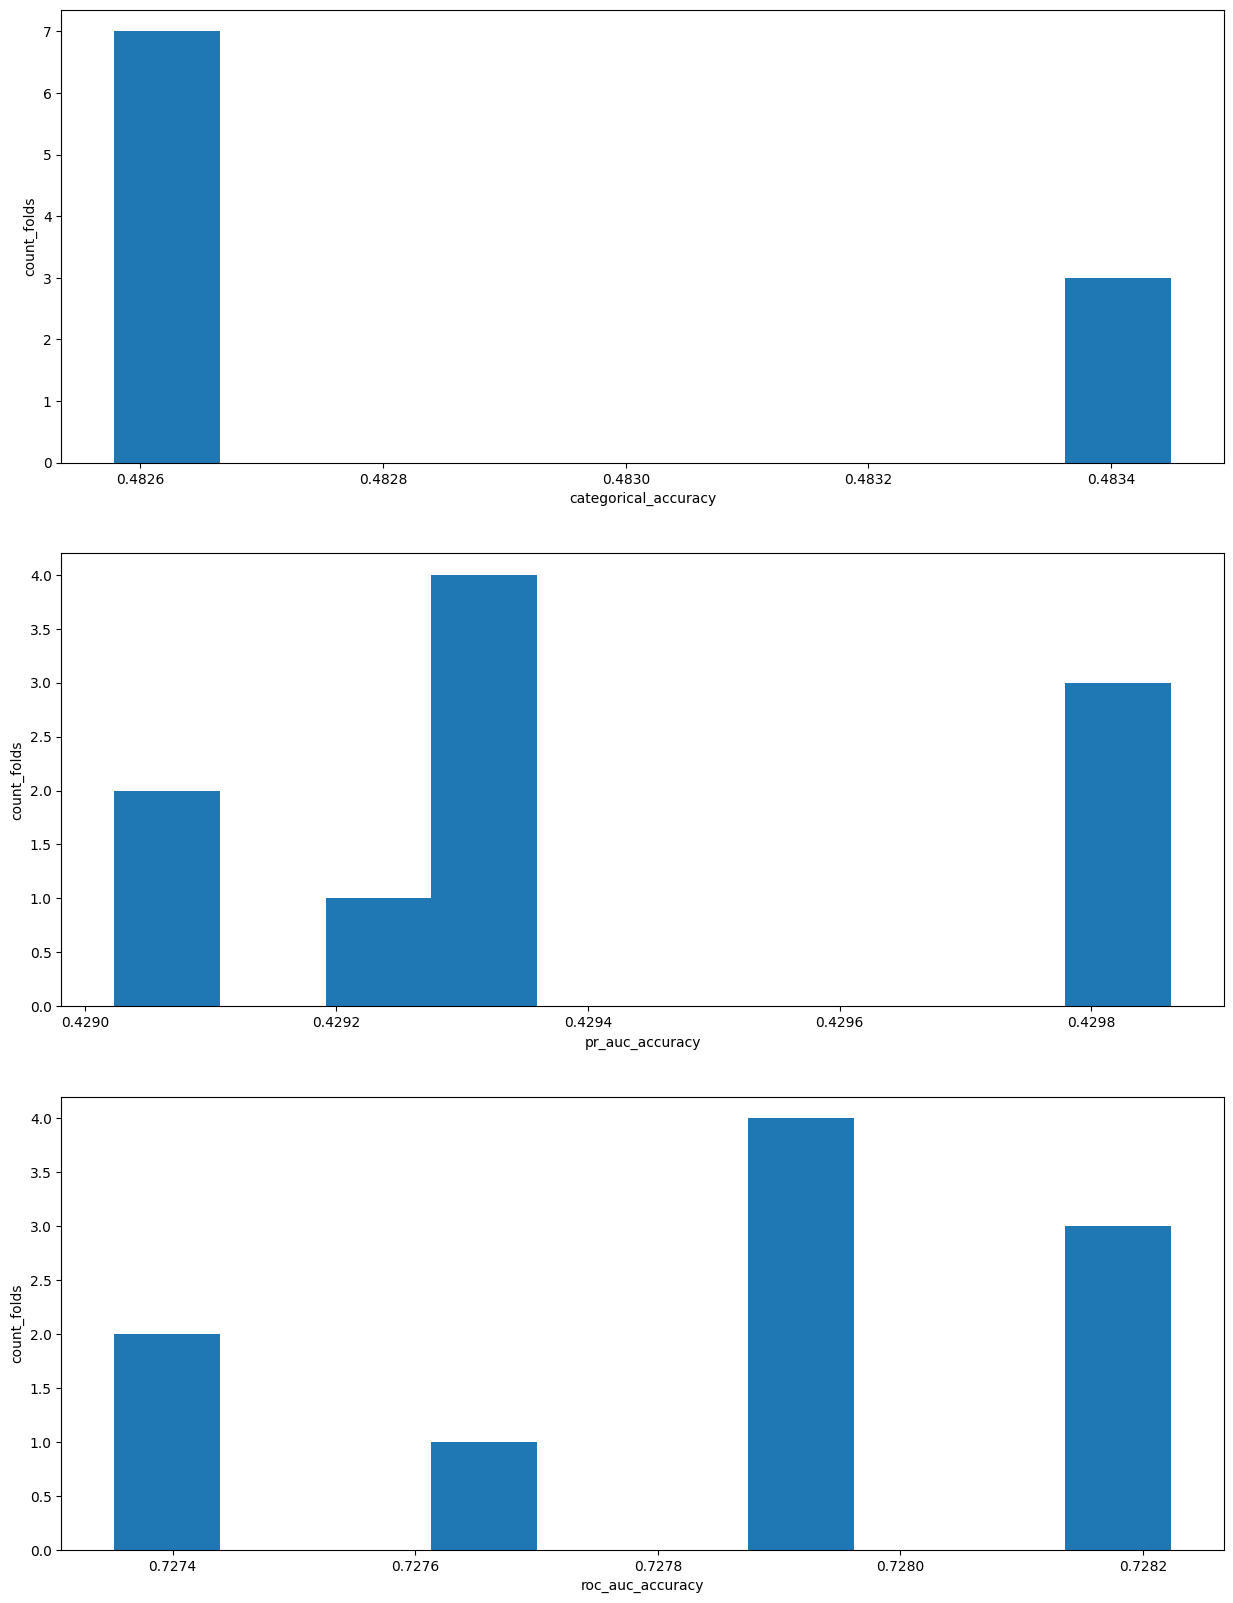

In [83]:
skf = StratifiedKFold(n_splits=10)
categorical_accuracies=[]
pr_auc_accuracies=[]
roc_auc_accuracies=[]
for train, test in skf.split(X, y):
    model.fit(X[train], y_cat[train], n_epoch=25)
    loss, categorical_accuracy, pr_auc_accuracy, roc_auc_accuracy = model.evaluate(X[test], y_cat[test])
    categorical_accuracies.append(categorical_accuracy)
    pr_auc_accuracies.append(pr_auc_accuracy)
    roc_auc_accuracies.append(roc_auc_accuracy)
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(15,20))
axes[0].hist(categorical_accuracies)
axes[0].set_xlabel('categorical_accuracy')
axes[0].set_ylabel('count_folds')
axes[1].hist(pr_auc_accuracies)
axes[1].set_xlabel('pr_auc_accuracy')
axes[1].set_ylabel('count_folds')
axes[2].hist(roc_auc_accuracies)
axes[2].set_xlabel('roc_auc_accuracy')
axes[2].set_ylabel('count_folds')

In [86]:
yp=np.argmax(model.predict(X_test),axis=-1)
yt=np.argmax(y_test,axis=-1)
print(confusion_matrix(yt,yp))
print(classification_report(yt,yp))

72/72 [==============================] - 0s 3ms/step
[[  0   1  19 148]
 [  0   0 240 100]
 [  0   0 997 136]
 [  0   0 595  60]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       168
           1       0.00      0.00      0.00       340
           2       0.54      0.88      0.67      1133
           3       0.14      0.09      0.11       655

    accuracy                           0.46      2296
   macro avg       0.17      0.24      0.19      2296
weighted avg       0.30      0.46      0.36      2296



In [88]:
model.model.save('model')

INFO:tensorflow:Assets written to: model\assets


INFO:tensorflow:Assets written to: model\assets
